In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv ('/content/drive/MyDrive/Celerates MSIB/ALL Dataset/Mall_Customers.csv')
df.shape

(200, 5)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
df = df[['Age', 'Spending Score (1-100)']]
df.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [7]:
model = KMeans(n_clusters=5)
model.fit(df)

KMeans(n_clusters=5)

In [8]:
model.cluster_centers_

array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [53.27272727, 13.68181818],
       [27.7173913 , 49.58695652],
       [34.40740741, 16.62962963]])

In [9]:
df_new = df.copy()
df_new['cluster'] = model.labels_
df_new.head()

,Age,Spending Score (1-100),cluster
0,19,39,3
1,21,81,1
2,20,6,4
3,23,77,1
4,31,40,3


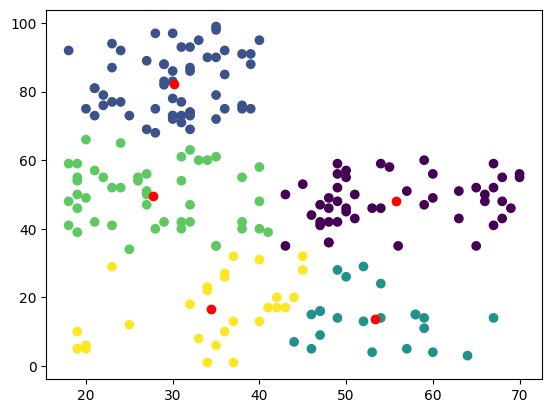

In [10]:
# Plot data and centroid centers

plt.scatter(df_new['Age'], df_new['Spending Score (1-100)'], c=df_new['cluster'])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='red')
plt.show()

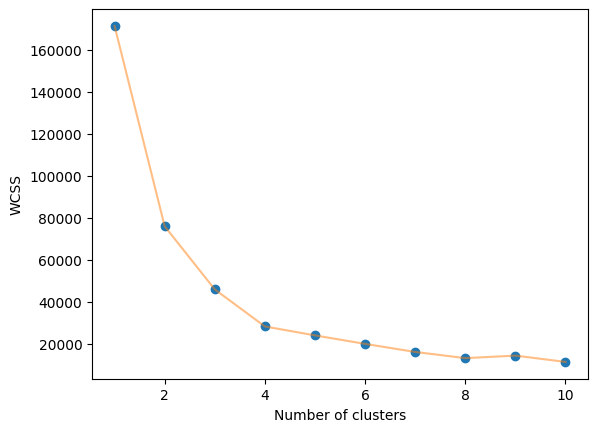

In [11]:
# elbow method
wcss = []
for i in range(1,11):
  model = KMeans(n_clusters=i)
  model.fit(df)
  wcss.append(model.inertia_)

plt.plot(range(1,11), wcss, 'o')
plt.plot(range(1,11), wcss, '-', alpha=0.5)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
model = KMeans(n_clusters=4)
model.fit(df)

KMeans(n_clusters=4)

In [13]:
model.cluster_centers_

array([[30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [55.70833333, 48.22916667],
       [43.29166667, 15.02083333]])

In [14]:
df_new = df.copy()
df_new['cluster'] = model.labels_
df_new.head()

,Age,Spending Score (1-100),cluster
0,19,39,1
1,21,81,0
2,20,6,3
3,23,77,0
4,31,40,1


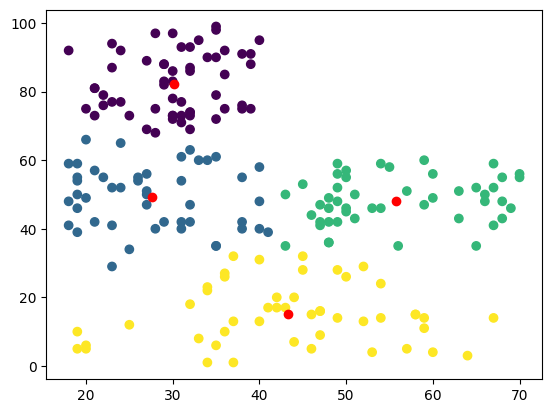

In [15]:
# Plot data and centroid centers

plt.scatter(df_new['Age'], df_new['Spending Score (1-100)'], c=df_new['cluster'])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='red')
plt.show()

Biru : Kelompok usia muda dengan spending tinggi

Kuning : Kelompok usia muda dengan spending menengah

Hijau : Kelompok usia dewasa dengan spending menengah

Ungu : Spending rendah segela usia

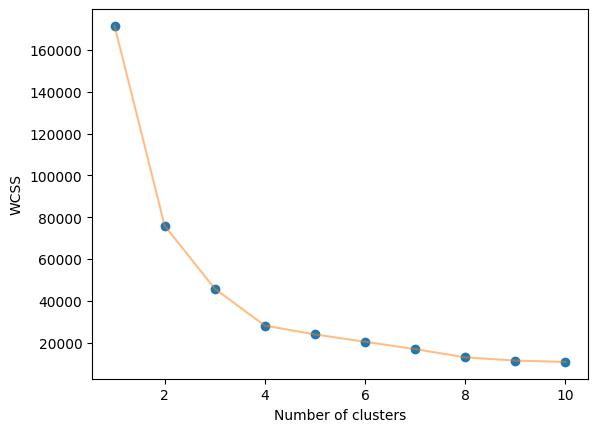

In [16]:
# elbow method
wcss = []
for i in range(1,11):
  model = KMeans(n_clusters=i)
  model.fit(df)
  wcss.append(model.inertia_)

plt.plot(range(1,11), wcss, 'o')
plt.plot(range(1,11), wcss, '-', alpha=0.5)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()